<a href="https://colab.research.google.com/github/joaothomazlemos/cat-dog-classification-with-CNN/blob/main/TRABALHO_FINAL_AI_cnn_cat_dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aluno: João Thomaz lemos

# Rede Neural Convolucional para classificação de imagens de gatos e cachorros

#OBJETIVO
Treinar uma rede neural convolucional para predição de imagens classificadas em cachorro ou gato.

O dataset utilizado tem 25000 imagens com label,  de onde foi utilizado 4000, sendo 80% para treino, 20% para validação.




# Discussão e resultados:

A rede neural inicialmente foi alimentada com o mesmo número de amostras e mesma altura e largura em relação aos demais modelos. Contudo, a rede neural precisa de um conjunto muito grande de amostras, e também precisa que as amostras tenham alta resolução em relação aos outros modelos, para que ela consiga fazer predições coerentes. Foi possível ver isso na prática, já que com poucos dados a rede não conseguia generalizar tão bem, decorando o conjunto e chegando a overfitting, o que gerou predições aleatórias. Além disso, ocorreu da rede decorar apenas uma classe, tendo uma predição de aproximadamente 50%. Percebeu-se depois, pela matriz confusão, que o motivo era que a rede acertava tudo de uma classe apenas, naturalmente, pois qualquer imagem que ela julgasse, seria associada a somente uma das classes, e havia balanceamente dos dados, onde 50% do conjunto pertencia a cada uma das classes. Além do aumento do número de imagens, foi utilizada a técnica de image augmentation, de forma que cada vez que a rede via uma batch de imagens passar pela iteração (epoch), a imagem nunca era a mesma, já que podia estar com diferente escala, rotação, offset de altura, offset de largura e espelhamento. E ainda, foi utilizado o método de dropout, de forma que os nerônios eram desativados de forma aleatória a cada iteração, para que a influencia de um determinado peso não ofuscasse os outros de forma dominante, o que gerou menos biases e aumentou a generalização. Apóss essas modificações, obteve-se um bom resultado, como esperado das redes neurais, que são muito utilizadas para tarefas relacionadas a visão computacional, principalmente na detecção de objetos. A acurácia do modelo foi alta como esperado, de 83% de acurácia.

# Import Library

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats



  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 34.2MB/s]
 95% 257M/271M [00:01<00:00, 175MB/s]
100% 271M/271M [00:01<00:00, 164MB/s]
 98% 531M/543M [00:03<00:00, 186MB/s]
100% 543M/543M [00:03<00:00, 168MB/s]


In [ ]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
import glob
from tensorflow import keras
from google.colab import files




In [ ]:

!ls

kaggle.json  sample_data  sampleSubmission.csv	test1.zip  train.zip


# Define Constants

In [ ]:

IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# Prepare Traning Data

In [ ]:
!unzip 'test1.zip'

In [ ]:
!unzip 'train.zip'

In [ ]:
# pegando 4000 imagens das 25k
filenames = os.listdir("train")
categories = []
data = []
names = []
d = 0
c = 1

for (i, filename) in enumerate(filenames):

  img = load_img("train/"+filename)


  category = filename.split('.')[0]
  if category == 'dog':
    if d == 2000: continue  # altera pra 4k
    d += 1
    categories.append(1)
    names.append(filename)
    data.append(img)

  else:
      if c == 2000: continue
      c += 1
      categories.append(0)
      names.append(filename)
      data.append(img)
print('c: {}'.format(c), '\n', 'd: {}'.format(d))

df = pd.DataFrame({
    'filename': names,
    'category': categories
})

c: 2000 
 d: 2000


In [ ]:
type(data[0]) # imagens carregadas para uma lista. será o total de dados

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
len(data)

3999

In [ ]:
df.head()

,filename,category
0,dog.10156.jpg,1
1,dog.8007.jpg,1
2,dog.3854.jpg,1
3,dog.8723.jpg,1
4,dog.11469.jpg,1


In [ ]:
df.iloc[195:205]

,filename,category
195,cat.7000.jpg,0
196,dog.8071.jpg,1
197,cat.3808.jpg,0
198,dog.6550.jpg,1
199,dog.8572.jpg,1
200,cat.3435.jpg,0
201,cat.3277.jpg,0
202,cat.3469.jpg,0
203,cat.2463.jpg,0
204,dog.8403.jpg,1


In [ ]:
df.tail()

,filename,category
3994,cat.2669.jpg,0
3995,cat.3148.jpg,0
3996,cat.6491.jpg,0
3997,cat.5440.jpg,0
3998,cat.9132.jpg,0


### See Total In count

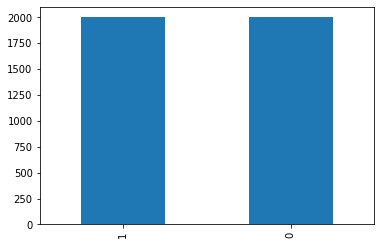

In [ ]:
# 2000 de cada
df['category'].value_counts().plot.bar()

# See sample image

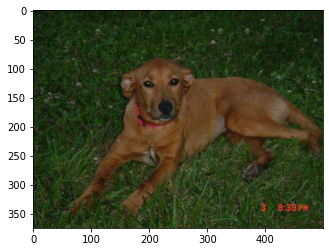

In [ ]:
sample = random.choice(df.filename)
image = load_img("train/"+sample)
plt.imshow(image)

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2))) # diminuindo as dimensoes das imagens pela metade
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) # tornando um sóh array para entrar na dense layer
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# rmsprop optmizer adapta a taxa de learning, para cada weight utilizando minibatches.
# olha o sinal da taxa , dos ultimos 2 iterações. Se for igual, dá uma aceleradinha.
# o gradiente é dividido pela raiz quadrada media (RMS) de todos gradientes, para cada peso
# mt utilizado para casos que nao convergem. ADAgrad é similar, mas o grad eh acumulado a cada step
# e vai diminuindo. O que é óyimo, para casos de convergencia.

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 126, 126, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 61, 61, 64)       2

# Callbacks

In [ ]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 2 epochs and val_loss value not decreased

In [ ]:
earlystop = EarlyStopping(patience=5) # teste com callback em 5 epochs

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [ ]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [ ]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [ ]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [ ]:
# sigmoid data
# df["category"] = df["category"].replace({'cat': 0, 'dog': 1}) 

In [ ]:
df.tail()

,filename,category
3994,cat.2669.jpg,cat
3995,cat.3148.jpg,cat
3996,cat.6491.jpg,cat
3997,cat.5440.jpg,cat
3998,cat.9132.jpg,cat


In [ ]:
# manipulando o df para que a primeira metade seja cat, e a segunda seja dog:
# df = df.sort_values(by='category')

In [ ]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True) ## aqui que deixa o index igual para saber a matrix conf

In [ ]:
train_df.tail()

,filename,category
3194,cat.9463.jpg,cat
3195,cat.1781.jpg,cat
3196,cat.766.jpg,cat
3197,cat.8201.jpg,cat
3198,cat.4642.jpg,cat


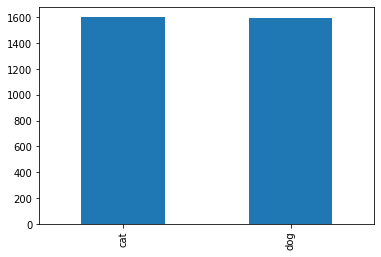

In [ ]:
train_df['category'].value_counts().plot.bar()

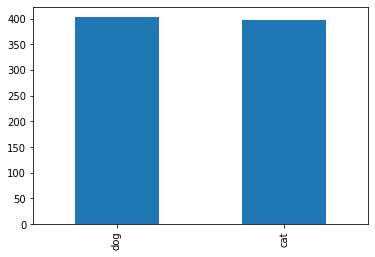

In [ ]:
validate_df['category'].value_counts().plot.bar()

In [ ]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [ ]:
total_train

3199

# Traning Generator

In [ ]:
#deixar apenas o rescale, para ser justo com os outros algoritmos.
# alterar a imagem toda vez que ela passa num epoch, bom pois temos poucas imagens nesse exemplo.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

# aqui, train generator é responsável por pegar cada imagem na pasta train, as que tem o nome do filename em df_trian
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    'train/', 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 3199 validated image filenames belonging to 2 classes.


### Validation Generator

In [ ]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical', # trocar para categorical quando nao usar sigmoid ou deixar binary
    batch_size=batch_size,
    shuffle=False # assim posso fazer a matrix confusão! Os labels vao corresponder as preds
)

Found 800 validated image filenames belonging to 2 classes.


# See how our generator work

In [ ]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


Seem to be nice 

# Fit Model

In [ ]:
epochs=20
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/20
213/213 [==============================] - 38s 131ms/step - loss: 1.1407 - accuracy: 0.5415 - val_loss: 0.9715 - val_accuracy: 0.5057 - lr: 0.0010
Epoch 2/20
213/213 [==============================] - 27s 128ms/step - loss: 0.7966 - accuracy: 0.5898 - val_loss: 0.7026 - val_accuracy: 0.5635 - lr: 0.0010
Epoch 3/20
213/213 [==============================] - 28s 129ms/step - loss: 0.7069 - accuracy: 0.6074 - val_loss: 0.6532 - val_accuracy: 0.6277 - lr: 0.0010
Epoch 4/20
213/213 [==============================] - 27s 128ms/step - loss: 0.6391 - accuracy: 0.6580 - val_loss: 0.6176 - val_accuracy: 0.6679 - lr: 0.0010
Epoch 5/20
213/213 [==============================] - 27s 129ms/step - loss: 0.6069 - accuracy: 0.6806 - val_loss: 0.7102 - val_accuracy: 0.5975 - lr: 0.0010
Epoch 6/20
213/213 [==============================] - ETA: 0s - loss: 0.5978 - accuracy: 0.6925
Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
213/213 [=========================

# Save Model and load

In [ ]:
# model.save("my_model")
# files.download("my_model")

In [ ]:
# # Load the previously saved weights
# model.save_weights('weights')



In [ ]:
# model.load_weights('weights')


In [ ]:
# #loading the model with pre trained weights:
# # It can be used to reconstruct the model identically.
# reconstructed_model = keras.models.load_model("my_model")

# # Let's check:
# np.testing.assert_allclose(
#     model.predict(validation_generator), reconstructed_model.predict()
# )

# # The reconstructed model is already compiled and has retained the optimizer
# # state, so training can resume:
# reconstructed_model.fit(validation_generator, test_target)

# Virtualize Training

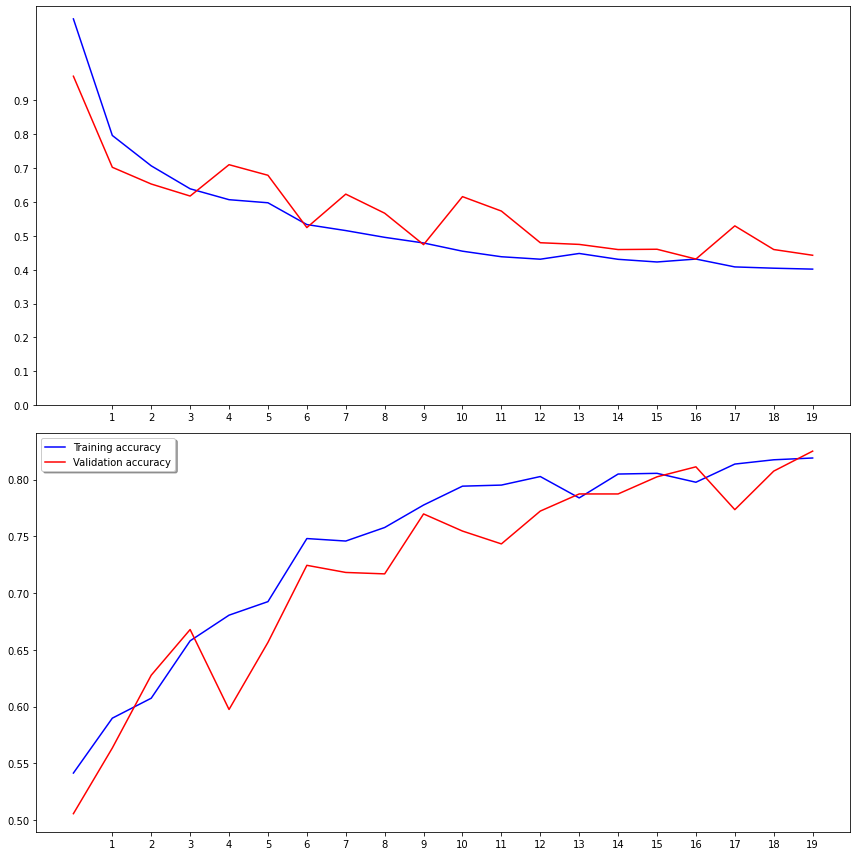

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))


ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [ ]:
test_filenames = os.listdir("test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
#teste com as ultimas 128 imagens
# test_df = test_df.iloc[(12500-128):]

#teste com as primeiras 128
test_df = test_df.iloc[:128]
nb_samples = test_df.shape[0]

In [ ]:
test_df.shape

(128, 1)

In [ ]:
test_df.tail()

,filename
123,11684.jpg
124,2394.jpg
125,6358.jpg
126,10530.jpg
127,11118.jpg


In [ ]:
len(test_df)

128

# Create Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# test_steps_per_epoch = np.math.ceil(test_generator.samples / test_generator.batch_size)

Found 128 validated image filenames.


# Predict

In [ ]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))



In [ ]:
len(predict)

128

In [ ]:
for i in predict[:5]:
  print(i)

[0.8830243  0.11697575]
[0.2232793  0.77672064]
[0.34068477 0.6593153 ]
[0.01492309 0.98507696]
[0.83516455 0.1648355 ]


In [ ]:
len (predict)

128

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
test_df.tail()

,filename,category
123,11684.jpg,1
124,2394.jpg,0
125,6358.jpg,0
126,10530.jpg,0
127,11118.jpg,0


We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items()) # replace com 0 = cat, 1 = dog
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df.tail()

,filename,category
123,11684.jpg,dog
124,2394.jpg,cat
125,6358.jpg,cat
126,10530.jpg,cat
127,11118.jpg,cat


From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Virtaulize Result

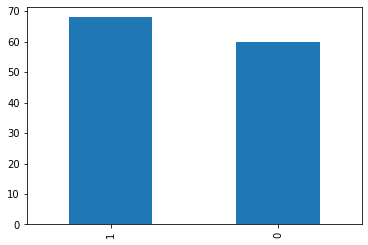

In [ ]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

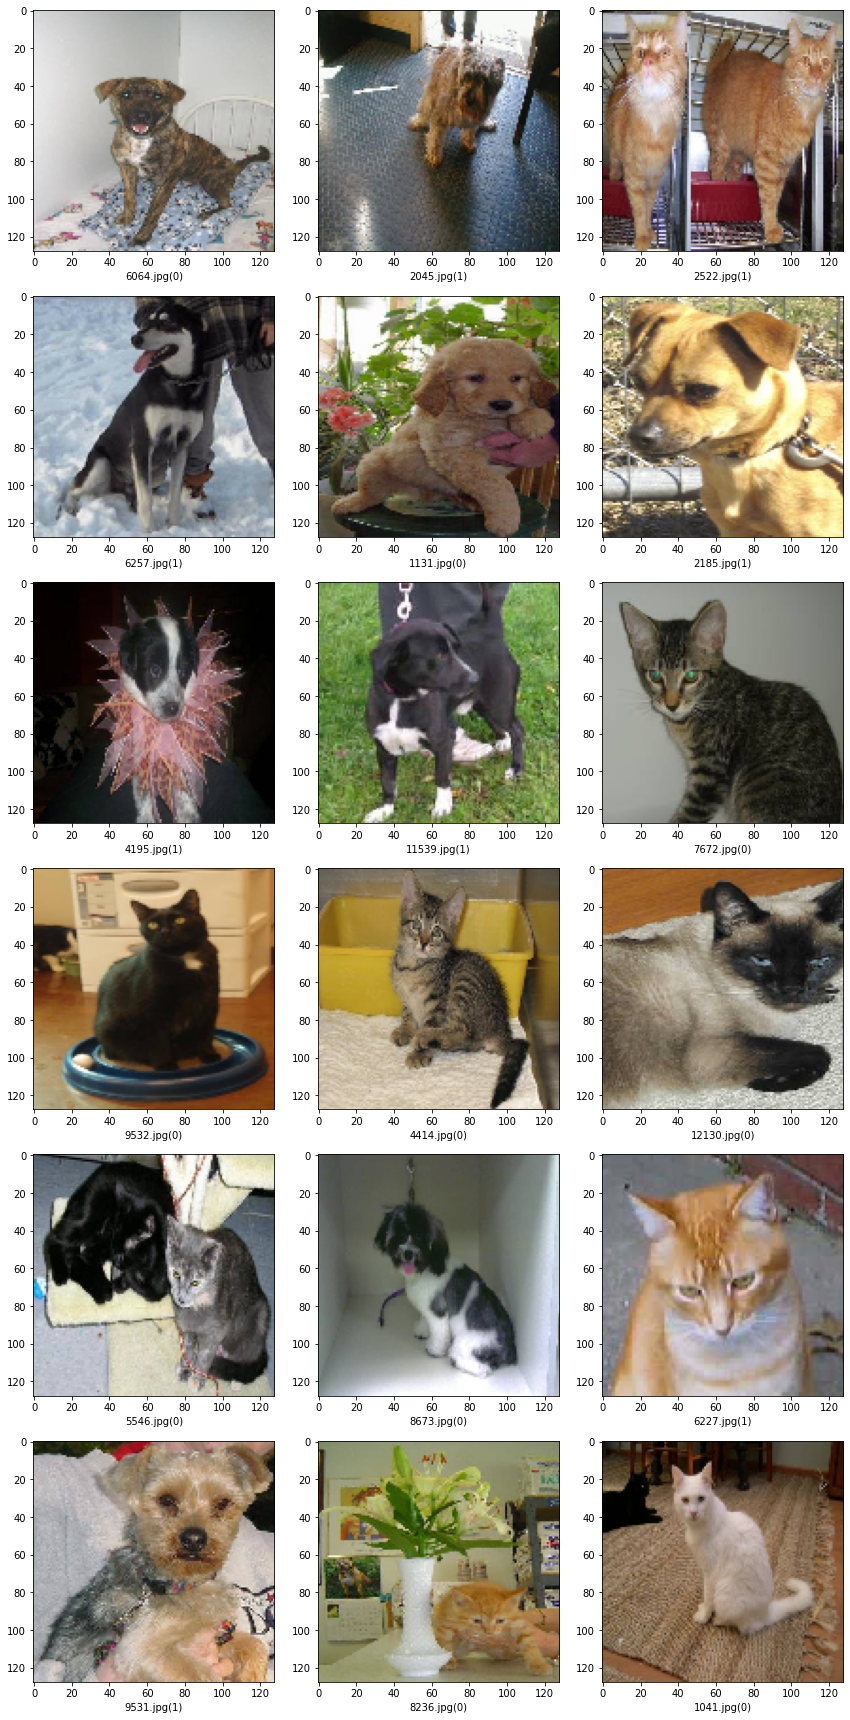

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

Fazendo a matriz confusão com as 800 imagens de validação:

In [ ]:
test_steps_per_epoch = validation_generator.samples/validation_generator.batch_size

In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = model.predict_generator(validation_generator, test_steps_per_epoch)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

print('Classification Report')
target_names = ['Cats', 'Dogs']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


Confusion Matrix
[[306  91]
 [ 49 354]]
Classification Report
              precision    recall  f1-score   support

        Cats       0.86      0.77      0.81       397
        Dogs       0.80      0.88      0.83       403

    accuracy                           0.82       800
   macro avg       0.83      0.82      0.82       800
weighted avg       0.83      0.82      0.82       800



82% de acc, como no visto no ultimo step de treino.

A matriz confusão!

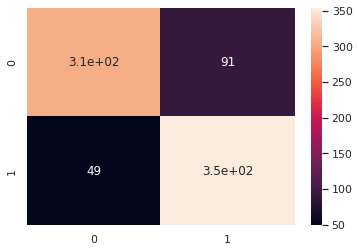

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set_theme()

conf = confusion_matrix(validation_generator.classes, y_pred)
sns.heatmap(conf, annot=True)                       
                        


Pela matriz confusão, vemos que a rede, que tem
 epoch 20/20
213/213 [==============================] - 28s 129ms/step - loss: 0.4019 - accuracy: 0.8191 - val_loss: 0.4428 - val_accuracy: 0.8252 - lr: 6.2500e-05,
 acerta 350 em imagens de dogs (1), e 310 para gatos(0).

Ela erra ao ver 49 imagens de dogs, e 91 imagens de gatos

In [ ]:
# !wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
# from colab_pdf import colab_pdf
# colab_pdf('TRABALHO_FINAL_AI_cnn_cat-dog.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/TRABALHO_FINAL_AI_cnn_cat-dog.ipynb to pdf
[NbConvertApp] Support files will be in TRABALHO_FINAL_AI_cnn_cat-dog_files/
[NbConvertApp] Making directory ./TRABALHO_FINAL_AI_cnn_cat-dog_files
[NbConvertApp] Making directory ./TRABALHO_FINAL_AI_cnn_cat-dog_files
[NbConvertApp] Making directory ./TRABALHO_FINAL_AI_cnn_cat-dog_files
[NbConvertApp] Making directory ./TRABALHO_FINAL_AI_cnn_cat-dog_files
[NbConvertApp] Making directory ./TRABALHO_FINAL_AI_cnn_cat-dog_files
[NbConvertApp] Making directory ./TRABALHO_FINAL_AI_cnn_cat-dog_files
[NbConvertApp] Making directory ./TRABALHO_FINAL_AI_cnn_cat-dog_files
[NbConvertApp] Writing 90691 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'